# The nonstationary fitting code is adapted from https://github.com/clairbarnes/wwa 

In [1]:
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt

import scipy
from scipy.stats import norm, gamma, lognorm, genextreme, genextreme as gev
from scipy.optimize import minimize
from xclim.indices.stats import fit

import random
import sys; sys.path.append('scripts/')
from nonstationary_fitting import *

In [2]:
era5_gmst = pd.read_csv('data/era5_global_mean_surf_temp.csv',index_col=0)
era5_gmst['gmst'] = era5_gmst['gmst'].rolling(5).mean()
era5_gmst_1979_2022 = era5_gmst[era5_gmst['time']>1978]
era5_gmst_1979_2022 = era5_gmst_1979_2022['gmst']
era5_gmst_1979_2022.index = range(1979,2023)

era5_gmst_1979_2022 = era5_gmst_1979_2022 - 273.15
era5_gmst_1979_2022 = era5_gmst_1979_2022 - era5_gmst_1979_2022[era5_gmst_1979_2022.index<2011].mean()

era5_gmst_1979_2021 = era5_gmst_1979_2022[era5_gmst_1979_2022.index<2022]
era5_gmst_1979_2021 = era5_gmst_1979_2021 - 273.15
era5_gmst_1979_2021 = era5_gmst_1979_2021 - era5_gmst_1979_2021[era5_gmst_1979_2021.index<2011].mean()

In [3]:
YRB_SAT_1979_2022 = pd.read_csv('data/YRB_averaged_SAT_1979_2022.csv',index_col=0)
YRB_SAT_1979_2022['t2m'] = YRB_SAT_1979_2022['t2m'] - 273.15
YRB_SAT_1979_2021 = YRB_SAT_1979_2022[:-1]
YRB_HWD_1979_2022 = pd.read_csv('data/YRB_averaged_HWD_1979_2022.csv',index_col=0)
YRB_HWD_1979_2021 = YRB_HWD_1979_2022[:-1]

In [4]:
YRB_HW_data_1979_2021 = pd.DataFrame({'SAT':YRB_SAT_1979_2021['t2m'].tolist(),'HWD':YRB_HWD_1979_2021['t2m'].tolist(),'GMST':era5_gmst_1979_2021.tolist()})
YRB_HW_data_1979_2022 = pd.DataFrame({'SAT':YRB_SAT_1979_2022['t2m'].tolist(),'HWD':YRB_HWD_1979_2022['t2m'].tolist(),'GMST':era5_gmst_1979_2022.tolist()})

In [5]:
gev.fit(YRB_SAT_1979_2021['t2m'].tolist())

(0.21877450883753807, 23.15137739949357, 0.44306322049553826)

In [6]:
# calculate nonstationary fitting parameters
# sigma and shape are the constant parameters
# mu and alpha is two new parameters to generate the time-varing location parameter, i.e., loc = mu + alpha * covariate
params_1979_2021_mdl = ns_fit(dist=gev,fittype="shift",data=YRB_HW_data_1979_2021,cov_name='GMST',var_name='SAT')
params_1979_2021 = params_1979_2021_mdl['results']
print(params_1979_2021)

 final_simplex: (array([[23.05798513,  0.34040654,  1.23575688,  0.21566048],
       [23.05796767,  0.34040927,  1.23570215,  0.21567708],
       [23.05798057,  0.34043141,  1.23582691,  0.21574382],
       [23.05795708,  0.34044466,  1.2356929 ,  0.21569836],
       [23.05800688,  0.34042347,  1.23572999,  0.21573716]]), array([16.07126921, 16.0712693 , 16.07126934, 16.07126959, 16.07126963]))
           fun: 16.071269205456424
       message: 'Optimization terminated successfully.'
          nfev: 237
           nit: 141
          pars: {'mu': 23.057985132706797, 'sigma': 0.3404065388479822, 'alpha': 1.2357568769917124, 'shape': 0.21566047878525715}
        status: 0
       success: True
             x: array([23.05798513,  0.34040654,  1.23575688,  0.21566048])


In [7]:
# including the 2022 event
params_1979_2022_mdl = ns_fit(dist=gev,fittype="shift",data=YRB_HW_data_1979_2022,cov_name='GMST',var_name='SAT')
params_1979_2022 = params_1979_2022_mdl['results']
print(params_1979_2022)

 final_simplex: (array([[23.05081844,  0.35450154,  1.35334223,  0.16998365],
       [23.05084818,  0.35449069,  1.35331706,  0.16995589],
       [23.05082971,  0.35450735,  1.35336115,  0.1700101 ],
       [23.05081186,  0.35449833,  1.35344014,  0.16997228],
       [23.05082233,  0.3545091 ,  1.35332034,  0.16995477]]), array([19.44466393, 19.44466396, 19.44466397, 19.44466403, 19.44466404]))
           fun: 19.44466393203229
       message: 'Optimization terminated successfully.'
          nfev: 245
           nit: 144
          pars: {'mu': 23.05081844330312, 'sigma': 0.35450153881622903, 'alpha': 1.3533422293793305, 'shape': 0.16998365257869602}
        status: 0
       success: True
             x: array([23.05081844,  0.35450154,  1.35334223,  0.16998365])


# plot Figure 2 for SAT

/Users/zeqinhuang/Documents/paper/HW_track/scripts/nonstationary_fitting.py:250: RuntimeWarning: divide by zero encountered in double_scalars
  return 1/ep


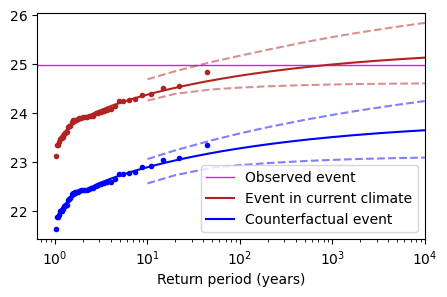

In [8]:
rlplot(params_1979_2021_mdl, era5_gmst_1979_2022.tolist()[-1], era5_gmst_1979_2022.tolist()[-1] - 1.2, YRB_SAT_1979_2022['t2m'][2022], lower = False, ax = None, ci_nsamp = 10, legend = True, seed = 1)


In [9]:
x_ci = np.array([10,20,50,100,200,500,1000,2000,5000,10000])
rc_1 = return_ci(params_1979_2021_mdl, era5_gmst_1979_2022.tolist()[-1], lower = False, ci_nsamp = 100, seed = 1)
rc_2 = return_ci(params_1979_2022_mdl, era5_gmst_1979_2022.tolist()[-1], lower = False, ci_nsamp = 100, seed = 1)

/Users/zeqinhuang/miniforge3/envs/tfMac38/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2500: RuntimeWarning: invalid value encountered in subtract
  -pex2+logpex2-logex2)
/Users/zeqinhuang/miniforge3/envs/tfMac38/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:2500: RuntimeWarning: invalid value encountered in subtract
  -pex2+logpex2-logex2)


/Users/zeqinhuang/Documents/paper/HW_track/scripts/nonstationary_fitting.py:250: RuntimeWarning: divide by zero encountered in true_divide
  return 1/ep
/var/folders/gl/305lw9j910n_yd3gdvyjpyz80000gn/T/ipykernel_52777/687510739.py:97: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


The 2022 YRB SAT is 24.99
The return period (not include 2022 event in the fitting) of the 2022 event is 877.04
The return period (include 2022 event in the fitting) of the 2022 event is 113.24


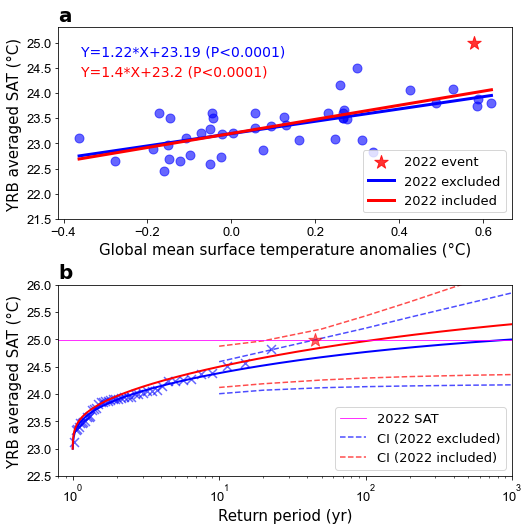

In [10]:
axes_locs = [
    [0.05,0.56,0.9,0.38],
    [0.05,0.05,0.9,0.38],
]

fig = plt.figure(figsize = (7,7))
ax1 = fig.add_axes(axes_locs[0])
ax1.scatter(era5_gmst_1979_2021.values,YRB_SAT_1979_2021['t2m'],marker='o',color='blue',alpha=0.6,s=80)
x1 = [era5_gmst_1979_2021.min(),era5_gmst_1979_2021.max()]
mu1 = params_1979_2021['pars']['mu']
alpha1 = params_1979_2021['pars']['alpha']
alpha1, mu1 = np.polyfit(YRB_HW_data_1979_2021.GMST, YRB_HW_data_1979_2021.SAT, 1)
y1 = [mu1+x1[0]*alpha1,mu1+x1[1]*alpha1]
l1 = ax1.plot(x1,y1,c='blue',linewidth=3)
s = 'Y=' + str(round(alpha1,2)) + '*X+' + str(round(mu1,2)) + ' (P<0.0001)'
ax1.text(x = 0.05, y = 0.85, s = s, fontsize=14, color = 'b',transform=ax1.transAxes)

star = ax1.scatter(era5_gmst_1979_2022.values[-1],YRB_SAT_1979_2022['t2m'][2022],marker='*',color='red',alpha=0.8,s=200)
x2 = [era5_gmst_1979_2022.min(),era5_gmst_1979_2022.max()]
mu2 = params_1979_2022['pars']['mu']
alpha2 = params_1979_2022['pars']['alpha']
alpha2, mu2 = np.polyfit(YRB_HW_data_1979_2022.GMST, YRB_HW_data_1979_2022.SAT, 1)
y2 = [mu2+x2[0]*alpha2,mu2+x2[1]*alpha2]
l2 = ax1.plot(x2,y2,c='red',linewidth=3)
s = 'Y=' + str(round(alpha2,2)) + '*X+' + str(round(mu2,2)) + ' (P<0.0001)'
ax1.text(x = 0.05, y = 0.75, s = s, fontsize=14, color = 'r',transform=ax1.transAxes)

ax1.set_ylabel('YRB averaged SAT (°C)',fontdict={'fontsize':15})
ax1.set_xlabel('Global mean surface temperature anomalies (°C)',fontdict={'fontsize':15})
ax1.set_ylim([21.5,25.3])
ax1.legend(
    [star,l1[0],l2[0]], ['2022 event','2022 excluded','2022 included'],fancybox = True,frameon=True, loc='lower right', #bbox_to_anchor=[0.65,0.35], 
    ncol=1,fontsize=13)

for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(13)

############# ax2
ax2 = fig.add_axes(axes_locs[1])
# z for return period
z1 = []
for i in range(len(YRB_SAT_1979_2022['t2m'].tolist())):
    z1.append(return_period(mdl = params_1979_2021_mdl,event_value = YRB_SAT_1979_2022['t2m'].tolist()[i],covariate=era5_gmst_1979_2022.tolist()[-1]))
z2 = []
for i in range(len(YRB_SAT_1979_2022['t2m'].tolist())):
    z2.append(return_period(mdl = params_1979_2022_mdl,event_value = YRB_SAT_1979_2022['t2m'].tolist()[i],covariate=era5_gmst_1979_2022.tolist()[-1]))

y_fit_1 = np.linspace(23, 25.1, 1000)
x_fit_1 = return_period(mdl = params_1979_2021_mdl,event_value = y_fit_1,covariate=era5_gmst_1979_2022.tolist()[-1])
ax2.plot(x_fit_1,y_fit_1,'-',color='blue',linewidth=2)

y_fit_2 = np.linspace(23, 26, 1000)
x_fit_2 = return_period(mdl = params_1979_2022_mdl,event_value = y_fit_2,covariate=era5_gmst_1979_2022.tolist()[-1])
ax2.plot(x_fit_2,y_fit_2,'-',color='red',linewidth=2)

l1 = ax2.plot(x_ci, rc_1.transpose(), color = "blue", ls = "--", alpha = 0.7)
l2 = ax2.plot(x_ci, rc_2.transpose(), color = "red", ls = "--", alpha = 0.7)

# ax2.scatter(z1,YRB_SAT_1979_2022['t2m'],marker='x',color='blue',alpha=0.6,s=80)
# ax2.scatter(z2,YRB_SAT_1979_2022['t2m'],marker='+',color='red',alpha=0.6,s=120)

YRB_SAT_1979_2022_shifted_to_2022 = YRB_SAT_1979_2022['t2m'] + (era5_gmst_1979_2022[2022] - era5_gmst_1979_2022) * alpha1
empirical_x = 1 / (1 - np.arange(1,len(YRB_SAT_1979_2022_shifted_to_2022)+1)/float(len(YRB_SAT_1979_2022_shifted_to_2022) + 1))
ax2.scatter(empirical_x[:-1],YRB_SAT_1979_2022_shifted_to_2022.sort_values()[:-1],marker='x',color='blue',alpha=0.6,s=80)
ax2.scatter(empirical_x[-1],YRB_SAT_1979_2022_shifted_to_2022.sort_values()[2022],marker='*',color='red',alpha=0.6,s=200,zorder=10)
# empirical_x = 1 / (1 - np.arange(1,len(YRB_SAT_1979_2022['t2m'])+1)/float(len(YRB_SAT_1979_2022['t2m']) + 1))
# ax2.scatter(empirical_x,YRB_SAT_1979_2022['t2m'].sort_values(),marker='x',color='blue',alpha=0.6,s=80)

ax2.set_xscale('log')
ax2.set_ylabel('YRB averaged SAT (°C)',fontdict={'fontsize':15})
ax2.set_xlabel('Return period (yr)',fontdict={'fontsize':15})
ax2.set_ylim([22.5,26])
ax2.set_xlim([0.8,10**3])
l3 = ax2.axhline(y=YRB_SAT_1979_2022_shifted_to_2022.sort_values()[2022],color='magenta',linewidth=0.8)

for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(13)

def add_panel_label(ax, label, x = -0.1, y = 1):
    ax.text(x, y, label, transform=ax.transAxes,
      fontsize=20, fontweight='bold', va='top', ha='left')
add_panel_label(ax1, 'a', x=0, y = 1.11)
add_panel_label(ax2, 'b', x=0, y = 1.11)

ax2.legend(
    [l3,l1[0],l2[0]], ['2022 SAT','CI (2022 excluded)','CI (2022 included)'],fancybox = True,frameon=True, loc='lower right',
    ncol=1,fontsize=13)

rp_2022_1 = return_period(mdl = params_1979_2021_mdl,event_value = YRB_SAT_1979_2022['t2m'][2022],covariate=era5_gmst_1979_2022.tolist()[-1])
rp_2022_2 = return_period(mdl = params_1979_2022_mdl,event_value = YRB_SAT_1979_2022['t2m'][2022],covariate=era5_gmst_1979_2022.tolist()[-1])
print('The 2022 YRB SAT is {:.2f}'.format(YRB_SAT_1979_2022['t2m'][2022]))
print('The return period (not include 2022 event in the fitting) of the 2022 event is {:.2f}'.format(rp_2022_1))
print('The return period (include 2022 event in the fitting) of the 2022 event is {:.2f}'.format(rp_2022_2))

plt.tight_layout()
plt.savefig("Figures/Fig2_GEV_fitting.pdf",bbox_inches='tight')
fig.savefig('Figures/Fig2_GEV_fitting.png',bbox_inches='tight')